Instructions:
- Perform the data exploration step (i.e. evaluate your data, # of observations, details about your data distributions, scales, missing data, column descriptions) Note: For image data you can still describe your data by the number of classes, # of images, plot example classes of the image, size of images, are sizes uniform? Do they need to be cropped? normalized? etc.
- Plot your data. For tabular data, you will need to run scatters, for image data, you will need to plot your example classes.
- How will you preprocess your data? You should explain this in your README.md file and link your Jupyter notebook to it. All code and  Jupyter notebooks have be uploaded to your repo.

In [1]:
!pip install pandas
!pip install opendatasets
!pip install Pillow

# Exploration

In [2]:

# import opendatasets as od
# import pandas as pd

# od.download(
#     "https://www.kaggle.com/datasets/kacpergregorowicz/house-plant-species")

### Import Necessary Libraries

In [2]:
import os
from PIL import Image, ImageOps
import numpy as np
import pandas as pd
import random
from torchvision import transforms
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

#Data Exploration

### Column Descriptions

In [4]:
# Set paths
data_dir = 'house-plant-species/house_plant_species/'  # Path where images are stored in subfolders by category
output_dir = 'processed_images/'    # Directory to save processed images by category
os.makedirs(output_dir, exist_ok=True)

# Create dataframe for plant categories

# Initialize a list to hold file paths and labels
file_paths = []
labels = []

# Loop through each category folder
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)

    # Check if it's a directory
    if os.path.isdir(category_path):
        for img_file in os.listdir(category_path):
            file_paths.append(os.path.join(category_path, img_file))  # Full path to the image
            labels.append(category)  # Folder name is the label

# Create the DataFrame
labels_df = pd.DataFrame({
    'file_path': file_paths,
    'species': labels
})

print(labels_df.head())

                                           file_path  \
0  house-plant-species/house_plant_species/Jade p...   
1  house-plant-species/house_plant_species/Jade p...   
2  house-plant-species/house_plant_species/Jade p...   
3  house-plant-species/house_plant_species/Jade p...   
4  house-plant-species/house_plant_species/Jade p...   

                       species  
0  Jade plant (Crassula ovata)  
1  Jade plant (Crassula ovata)  
2  Jade plant (Crassula ovata)  
3  Jade plant (Crassula ovata)  
4  Jade plant (Crassula ovata)  


The file_path column holds the full file path to each image in the dataset. The species column corresponds to the species of each plant image. The species names are derived from the folder name containing the image, and serves as the label.

### Attributes of Dataset

In [5]:
# Count the number of images per species
species_counts = labels_df['species'].value_counts()
print(species_counts.to_string())

# Total number of images
total_images = labels_df.shape[0]

# Total number of unique classes (species)
total_classes = labels_df['species'].nunique()

print(f"Total number of images: {total_images}")
print(f"Total number of classes (species): {total_classes}")

species
Monstera Deliciosa (Monstera deliciosa)       547
Dumb Cane (Dieffenbachia spp.)                541
Chinese evergreen (Aglaonema)                 514
Lilium (Hemerocallis)                         480
Anthurium (Anthurium andraeanum)              455
ZZ Plant (Zamioculcas zamiifolia)             438
Daffodils (Narcissus spp.)                    421
Lily of the valley (Convallaria majalis)      416
Prayer Plant (Maranta leuconeura)             400
Snake plant (Sanseviera)                      396
Peace lily                                    385
Chinese Money Plant (Pilea peperomioides)     382
Money Tree (Pachira aquatica)                 359
Jade plant (Crassula ovata)                   353
Ctenanthe                                     347
Tulip                                         341
Tradescantia                                  341
Polka Dot Plant (Hypoestes phyllostachya)     341
African Violet (Saintpaulia ionantha)         337
Elephant Ear (Alocasia spp.)              

### Check for Corrupted Files

In [6]:
def check_images(directory):
    corrupted_files = []

    for subdir, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                file_path = os.path.join(subdir, file)
                # Check if the image can be opened
                try:
                    img = Image.open(file_path)
                    img.verify()  # Verify that it is, in fact, an image
                except (IOError, SyntaxError) as e:
                    corrupted_files.append(file_path)
                    print(f"Corrupted file: {file_path}")

    return corrupted_files

# Specify the root directory of your image dataset
base_dir = 'house-plant-species/house_plant_species'
corrupted = check_images(base_dir)

print("Corrupted Files:", corrupted)


Corrupted Files: []


### Image Sizes

In [ ]:
def check_image_sizes(df):
    sizes = []

    # Loop through each image path in the DataFrame
    for img_path in df['file_path']:
        with Image.open(img_path) as img:
            sizes.append(img.size)  # (width, height)

    # Convert to a set to get unique sizes
    unique_sizes = set(sizes)

    if len(unique_sizes) == 1:
        print("All images are uniform in size:", unique_sizes.pop())
    else:
        print("Images have varying sizes.")
        # Removed so GitHub preview works
        # print("Unique sizes:", unique_sizes) # commented because GitHub was struggling to preview

# Check if images are uniform in size
check_image_sizes(labels_df)

Images have varying sizes.


### Example Classes

In [ ]:
def plot_example_images(df, num_classes=5, images_per_class=3):
    # Select the unique species (classes) and limit to num_classes if specified
    classes = df['species'].unique()[:num_classes]

    plt.figure(figsize=(15, 3 * num_classes))  # Adjust figure size to fit the number of rows

    # Loop through each class and plot a few example images
    for i, species in enumerate(classes):
        # Filter DataFrame for the current species and get a sample of images
        sample_images = df[df['species'] == species].sample(images_per_class)['file_path']

        for j, img_path in enumerate(sample_images):
            # Calculate subplot index
            plt_idx = i * images_per_class + j + 1
            plt.subplot(num_classes, images_per_class, plt_idx)

            # Open and display the image
            img = Image.open(img_path)
            plt.imshow(img)
            plt.axis('off')

            # Add species label as title once per row
            if j == 1:
                plt.title(species, fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Plot 3 images for each of the example classes (adjust num_classes as needed)

# Removed so GitHub preview works
# plot_example_images(labels_df, num_classes=47, images_per_class=3) 

## EDA

# Preprocessing Images

### Remove Corrupted Images

In [9]:
def remove_corrupted_images(data_dir):
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            for img_file in tqdm(os.listdir(category_path)):
                img_path = os.path.join(category_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        img.verify()  # Check if the image can be opened
                except (IOError, SyntaxError):
                    os.remove(img_path)
                    print(f'Removed corrupted image: {img_file} in {category} folder')

remove_corrupted_images(data_dir)

  0%|          | 0/353 [00:00<?, ?it/s]

100%|██████████| 290/290 [00:00<00:00, 4414.34it/s]


### Resize Images and Convert to a Consistent Format

In [10]:
# Check to see what image types we have in the original data
image_types = set()

# Traverse each subfolder and collect unique file extensions
for root, _, files in os.walk(data_dir):
    for file in files:
        # Get the file extension
        ext = os.path.splitext(file)[1].lower()  # Convert to lowercase for consistency
        image_types.add(ext)

print("Unique image types in the dataset:", image_types)

Unique image types in the dataset: {'', '.jpe', '.jpg', '.png', '.gif', '.jfif', '.jpeg', '.webp'}


In [11]:
IMAGE_DIMENSIONS = 224
def resize(data_dir, output_dir, size=(IMAGE_DIMENSIONS, IMAGE_DIMENSIONS), format='JPEG'):
    accepted_types = {'.jpg', '.jpe', '.gif', '.jpeg', '.jfif', '.png', '.webp'}

    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        output_category_path = os.path.join(output_dir, category)
        os.makedirs(output_category_path, exist_ok=True)

        if os.path.isdir(category_path):
            for img_file in tqdm(os.listdir(category_path)):
                ext = os.path.splitext(img_file)[1].lower()

                if ext in accepted_types:
                    img_path = os.path.join(category_path, img_file)
                    output_path = os.path.join(output_category_path, img_file.split('.')[0] + '.jpg')

                    try:
                        with Image.open(img_path) as img:
                            # Convert palette images with transparency to RGBA first
                            if img.mode == 'P' or img.mode == 'RGBA':
                                img = img.convert('RGBA')

                            # Resize
                            img = ImageOps.fit(img, size, Image.LANCZOS).convert('RGB')
                            img.save(output_path, format=format)
                    except Exception as e:
                        print(f'Error processing {img_file} in {category} folder: {e}')

resize(data_dir, output_dir)

100%|██████████| 290/290 [00:10<00:00, 27.18it/s]


In [12]:
# # Zip the output directory and download locally
# import shutil
# # from google.colab import files

# # Path to the output directory where resized images are saved
# output_dir = 'output_images'  # Replace with your output directory
# zip_file = 'resized_images.zip'

# # Compress the output directory into a zip file
# shutil.make_archive('resized_images', 'zip', output_dir)

# # Download the zip file to your local machine
# files.download('resized_images.zip')

# Model 1

### Label Encoding the Categories

In [ ]:
# Get unique categories
category_labels = labels_df['species'].unique()
print("Category Labels:", category_labels)
print("Number of Categories:", len(category_labels))

Category Labels: ['Jade plant (Crassula ovata)' 'Rubber Plant (Ficus elastica)'
 'Schefflera' 'Areca Palm (Dypsis lutescens)'
 'Asparagus Fern (Asparagus setaceus)'
 'Iron Cross begonia (Begonia masoniana)'
 'Lily of the valley (Convallaria majalis)'
 'Prayer Plant (Maranta leuconeura)' 'Dracaena' 'Aloe Vera'
 'Begonia (Begonia spp.)' 'Kalanchoe' 'Lilium (Hemerocallis)'
 'Pothos (Ivy arum)' 'Polka Dot Plant (Hypoestes phyllostachya)' 'Yucca'
 'Dumb Cane (Dieffenbachia spp.)' 'Daffodils (Narcissus spp.)'
 'Elephant Ear (Alocasia spp.)' 'Poinsettia (Euphorbia pulcherrima)'
 'Calathea' 'Monstera Deliciosa (Monstera deliciosa)'
 'Hyacinth (Hyacinthus orientalis)' 'Sago Palm (Cycas revoluta)'
 'Chrysanthemum' 'Ponytail Palm (Beaucarnea recurvata)'
 'Anthurium (Anthurium andraeanum)' 'Tradescantia'
 'Chinese Money Plant (Pilea peperomioides)'
 'Chinese evergreen (Aglaonema)' 'Tulip'
 'Parlor Palm (Chamaedorea elegans)' 'Peace lily'
 'ZZ Plant (Zamioculcas zamiifolia)' 'Venus Flytrap'
 'Chris

In [25]:
# Save labels_df to csv for later use
labels_df.to_csv('labels_df.csv', index=False)

### Label Encoding and One-Hot Encoding
We have two encoding functions that we can use. Label-encoding is more general, but one-hot is more commonly used for non-ordinal categories. However, because we have 47 classes, one-hot encoding would be computationally more expensive and may lead to the curse of dimensionality.

In [26]:
# Label Encoding
label_encoder = LabelEncoder()

# Fit the encoder and transform the species column
labels_df['encoded_label'] = label_encoder.fit_transform(labels_df['species'])

# Display the mapping of labels to integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)

labels_df['encoded_label']

Label Encoding Mapping: {'African Violet (Saintpaulia ionantha)': 0, 'Aloe Vera': 1, 'Anthurium (Anthurium andraeanum)': 2, 'Areca Palm (Dypsis lutescens)': 3, 'Asparagus Fern (Asparagus setaceus)': 4, 'Begonia (Begonia spp.)': 5, 'Bird of Paradise (Strelitzia reginae)': 6, 'Birds Nest Fern (Asplenium nidus)': 7, 'Boston Fern (Nephrolepis exaltata)': 8, 'Calathea': 9, 'Cast Iron Plant (Aspidistra elatior)': 10, 'Chinese Money Plant (Pilea peperomioides)': 11, 'Chinese evergreen (Aglaonema)': 12, 'Christmas Cactus (Schlumbergera bridgesii)': 13, 'Chrysanthemum': 14, 'Ctenanthe': 15, 'Daffodils (Narcissus spp.)': 16, 'Dracaena': 17, 'Dumb Cane (Dieffenbachia spp.)': 18, 'Elephant Ear (Alocasia spp.)': 19, 'English Ivy (Hedera helix)': 20, 'Hyacinth (Hyacinthus orientalis)': 21, 'Iron Cross begonia (Begonia masoniana)': 22, 'Jade plant (Crassula ovata)': 23, 'Kalanchoe': 24, 'Lilium (Hemerocallis)': 25, 'Lily of the valley (Convallaria majalis)': 26, 'Money Tree (Pachira aquatica)': 27, '

0        23
1        23
2        23
3        23
4        23
         ..
14785     7
14786     7
14787     7
14788     7
14789     7
Name: encoded_label, Length: 14790, dtype: int64

In [ ]:
# Save the label encodings
label_mapping = {key: int(value) for key, value in label_mapping.items()}

# Save the label mapping for reference
import json
with open('label_mapping.json', 'w') as f:
    json.dump(label_mapping, f)


In [28]:
# One-Hot Encoding
one_hot_labels = pd.get_dummies(labels_df['species'], prefix='species')

# Concatenate the one-hot encoded columns back to the original DataFrame
labels_df = pd.concat([labels_df, one_hot_labels], axis=1)

# Drop the original 'species' column if it’s no longer needed
labels_df = labels_df.drop('species', axis=1)

# Display the result
labels_df.head()

,file_path,encoded_label,species_African Violet (Saintpaulia ionantha),species_Aloe Vera,species_Anthurium (Anthurium andraeanum),species_Areca Palm (Dypsis lutescens),species_Asparagus Fern (Asparagus setaceus),species_Begonia (Begonia spp.),species_Bird of Paradise (Strelitzia reginae),species_Birds Nest Fern (Asplenium nidus),...,species_Rattlesnake Plant (Calathea lancifolia),species_Rubber Plant (Ficus elastica),species_Sago Palm (Cycas revoluta),species_Schefflera,species_Snake plant (Sanseviera),species_Tradescantia,species_Tulip,species_Venus Flytrap,species_Yucca,species_ZZ Plant (Zamioculcas zamiifolia)
0,house-plant-species/house_plant_species/Jade p...,23,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,house-plant-species/house_plant_species/Jade p...,23,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,house-plant-species/house_plant_species/Jade p...,23,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,house-plant-species/house_plant_species/Jade p...,23,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,house-plant-species/house_plant_species/Jade p...,23,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Save the one-hot encodings
labels_df.to_csv('one_hot_encoded_labels.csv', index=False)

In [30]:
import os
import shutil
from sklearn.model_selection import train_test_split

ROOT_DIR = 'processed_images'
TRAIN_DIR = 'images_train'
VAL_DIR = 'images_val'
TEST_DIR = 'images_test'
SPLIT_RATIO = 0.2
TEST_RATIO = 0.15
VAL_RATIO = 0.1765
RANDOM_STATE = 42

os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(VAL_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)

for class_name in os.listdir(ROOT_DIR):
    class_path = os.path.join(ROOT_DIR, class_name)
    if os.path.isdir(class_path):
        if ".DS_Store" in class_path:
            continue

        images = os.listdir(class_path) # gets all images in class

        train_val_images, test_images = train_test_split(images, test_size=TEST_RATIO, random_state=RANDOM_STATE)
        train_images, val_images = train_test_split(train_val_images, test_size=VAL_RATIO, random_state=RANDOM_STATE)

        train_class_dir = os.path.join(TRAIN_DIR, class_name)
        val_class_dir = os.path.join(VAL_DIR, class_name)
        test_class_dir = os.path.join(TEST_DIR, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Copy train images
        for img_name in train_images:
            shutil.copy(os.path.join(class_path, img_name), os.path.join(train_class_dir, img_name))

        # Copy validation images
        for img_name in val_images:
            shutil.copy(os.path.join(class_path, img_name), os.path.join(val_class_dir, img_name))

        # Copy test images
        for img_name in test_images:
            shutil.copy(os.path.join(class_path, img_name), os.path.join(test_class_dir, img_name))

In [31]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F

dataset = datasets.ImageFolder(root=data_dir)

num_classes = len(dataset.classes)

In [32]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize to the desired size
    transforms.ToTensor(),                        # Convert PIL Image to Tensor
    transforms.Normalize((0.5,), (0.5,)),         # Normalize (mean=0.5, std=0.5 for grayscale)
])

In [33]:
train_dataset = datasets.ImageFolder(root=TRAIN_DIR, transform=transform)
val_dataset = datasets.ImageFolder(root=VAL_DIR, transform=transform)
test_dataset = datasets.ImageFolder(root=TEST_DIR, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [34]:
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

        # Print progress every few batches
        if batch_idx % 10 == 0:
            print(f"Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}")

    return running_loss / len(train_loader.dataset)


def evaluate(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class PlantClassifierCNN(nn.Module):
    def __init__(self, num_classes):
        super(PlantClassifierCNN, self).__init__()
        # Define layers of the CNN
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # 3 input channels for RGB
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 56 * 56, 128)  # Adjust based on image size
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PlantClassifierCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [36]:
num_epochs = 5

for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_accuracy = evaluate(model, test_loader, device)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy:.4f}", flush=True)

Batch 0/162, Loss: 3.8567
Batch 10/162, Loss: 3.8260
Batch 20/162, Loss: 3.8570
Batch 30/162, Loss: 3.7955
Batch 40/162, Loss: 3.7154
Batch 50/162, Loss: 3.7080
Batch 60/162, Loss: 3.5279
Batch 70/162, Loss: 3.6295
Batch 80/162, Loss: 3.5600
Batch 90/162, Loss: 3.2418
Batch 100/162, Loss: 3.2989
Batch 110/162, Loss: 3.2927
Batch 120/162, Loss: 3.4049
Batch 130/162, Loss: 3.4669
Batch 140/162, Loss: 3.3086
Batch 150/162, Loss: 3.4749
Batch 160/162, Loss: 3.3250
Epoch [1/5], Loss: 3.6918, Test Accuracy: 0.1214
Batch 0/162, Loss: 3.2296
Batch 10/162, Loss: 3.3290
Batch 20/162, Loss: 3.0320
Batch 30/162, Loss: 2.8270
Batch 40/162, Loss: 3.3771
Batch 50/162, Loss: 3.0331
Batch 60/162, Loss: 3.0400
Batch 70/162, Loss: 3.0749
Batch 80/162, Loss: 2.9752
Batch 90/162, Loss: 2.8338
Batch 100/162, Loss: 2.9647
Batch 110/162, Loss: 3.2756
Batch 120/162, Loss: 3.1817
Batch 130/162, Loss: 3.1635
Batch 140/162, Loss: 2.9419
Batch 150/162, Loss: 3.0916
Batch 160/162, Loss: 3.2974
Epoch [2/5], Loss: 3.

In [37]:
test_accuracy = evaluate(model, test_loader, device)

In [38]:
test_accuracy

0.20169567157518964

In [39]:
train_accuracy = evaluate(model, train_loader, device)
train_accuracy

0.7640896304200213

In [40]:
validation_accuracy = evaluate(model, val_loader, device)
validation_accuracy

0.19151785714285716

Training Set:


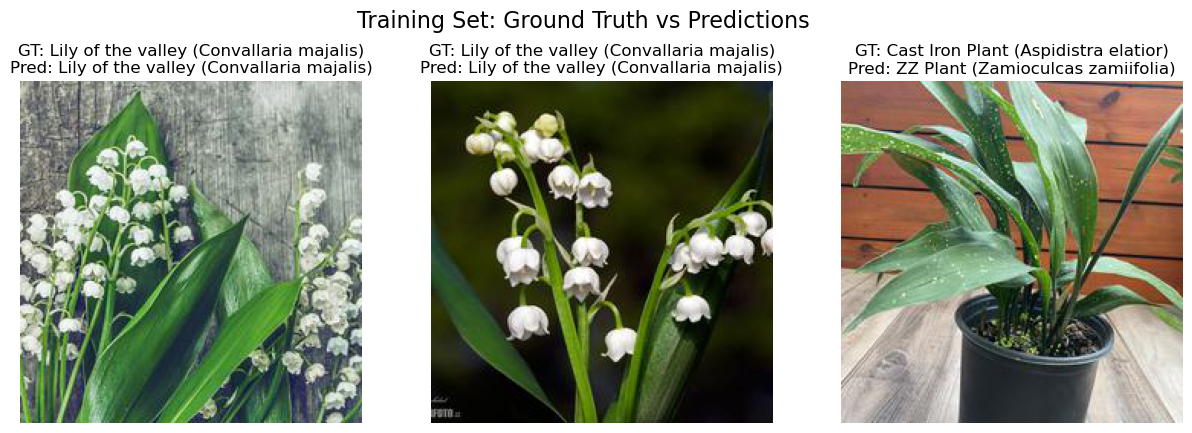

Validation Set:


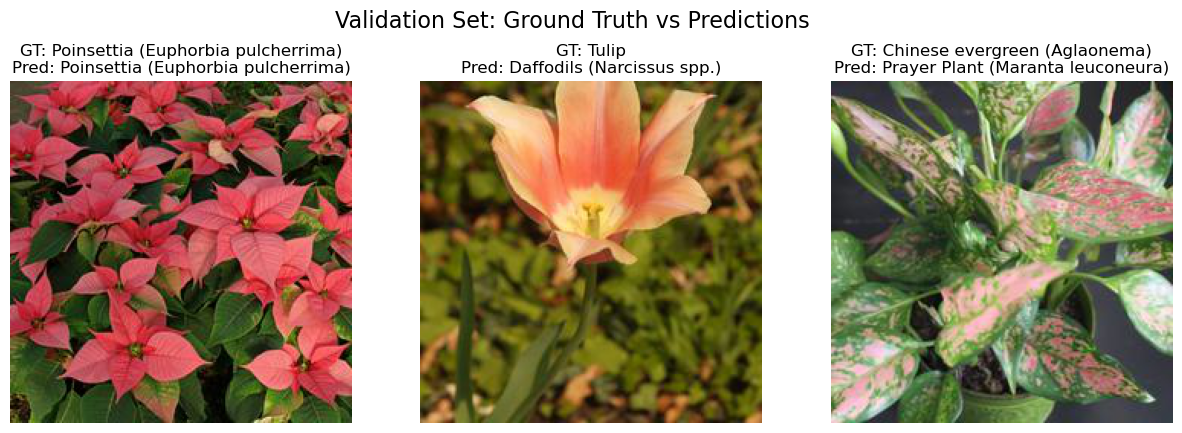

Testing Set:


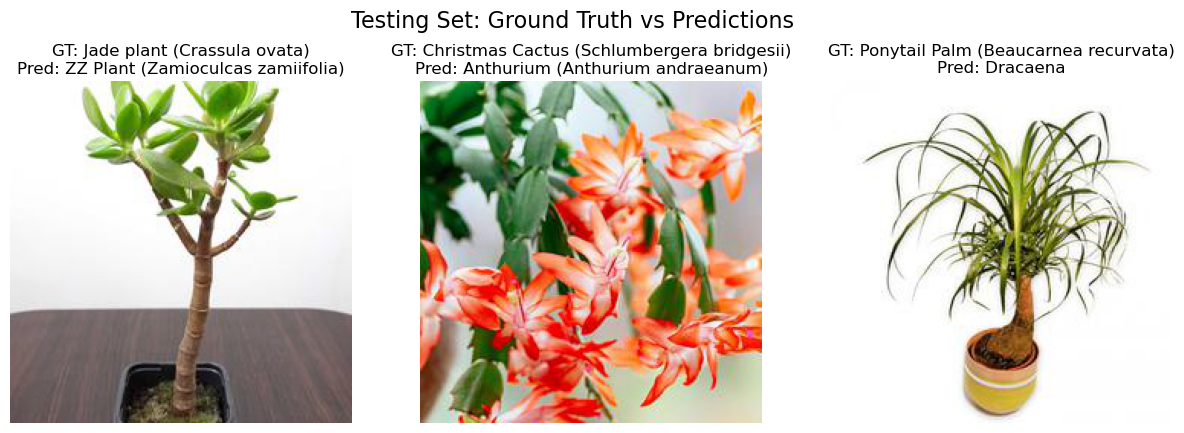

In [41]:
import matplotlib.pyplot as plt
import torch
import random

def visualize_predictions(model, dataset, dataset_name, class_names, device, num_samples=3):
    """
    Visualizes ground truth and predictions for randomly selected samples in the dataset.
    Handles RGB images.
    
    Parameters:
    - model: Trained PyTorch model.
    - dataset: PyTorch dataset (train, val, or test).
    - dataset_name: String ("Train", "Validation", "Test") to indicate dataset.
    - class_names: List of class names corresponding to labels.
    - device: The device used for computation (CPU or GPU).
    - num_samples: Number of samples to visualize (default is 3).
    """
    model.eval()  # Set model to evaluation mode
    
    # Randomly sample indices from the dataset
    random_indices = random.sample(range(len(dataset)), num_samples)
    
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    
    for i, idx in enumerate(random_indices):
        # Get the sample at the random index
        image, label = dataset[idx]
        image = image.to(device).unsqueeze(0)  # Add batch dimension
        
        # Get prediction
        with torch.no_grad():
            output = model(image)
            _, predicted_label = torch.max(output, 1)
        
        # Convert tensor to numpy for display
        img = image.squeeze(0).cpu().numpy()  # Remove batch dimension
        img = img.transpose(1, 2, 0)  # Convert [C, H, W] to [H, W, C] for RGB
        
        # Reverse normalization for proper visualization
        img = img * 0.5 + 0.5  # Undo normalization (mean=0.5, std=0.5)
        img = (img * 255).astype('uint8')  # Scale to [0, 255]
        
        # Plot the image with ground truth and prediction
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"GT: {class_names[label]}\nPred: {class_names[predicted_label.item()]}")
    
    plt.suptitle(f"{dataset_name} Set: Ground Truth vs Predictions", fontsize=16)
    plt.show()


# Visualize predictions for train, validation, and test sets
class_names = train_dataset.classes  # Class names from ImageFolder

print("Training Set:")
visualize_predictions(model, train_dataset, "Training", class_names, device)

print("Validation Set:")
visualize_predictions(model, val_dataset, "Validation", class_names, device)

print("Testing Set:")
visualize_predictions(model, test_dataset, "Testing", class_names, device)

### CNN Classification Report

In [ ]:
from sklearn.metrics import classification_report
import torch

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Get predictions
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest score
        
        # Append predictions and true labels
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

class_names = os.listdir(ROOT_DIR)
# Generate classification report
report = classification_report(all_labels, all_preds, target_names=class_names)
print("Classification Report:")
print(report)


Classification Report:
                                            precision    recall  f1-score   support

     African Violet (Saintpaulia ionantha)       0.47      0.33      0.39        51
                                 Aloe Vera       0.00      0.00      0.00        38
          Anthurium (Anthurium andraeanum)       0.23      0.10      0.14        69
             Areca Palm (Dypsis lutescens)       0.19      0.24      0.21        29
       Asparagus Fern (Asparagus setaceus)       0.50      0.08      0.13        26
                    Begonia (Begonia spp.)       1.00      0.03      0.05        36
     Bird of Paradise (Strelitzia reginae)       0.00      0.00      0.00        27
         Birds Nest Fern (Asplenium nidus)       0.15      0.14      0.14        44
        Boston Fern (Nephrolepis exaltata)       0.14      0.81      0.24        47
                                  Calathea       0.15      0.04      0.06        50
      Cast Iron Plant (Aspidistra elatior)       0.0

c:\Users\yusop\miniconda3\envs\cse151a\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yusop\miniconda3\envs\cse151a\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yusop\miniconda3\envs\cse151a\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

### CNN FN/FP

In [ ]:
import torch
from sklearn.metrics import confusion_matrix

# Initialize lists to store true labels and predictions
all_preds = []
all_labels = []

model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Get model predictions
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get predicted class indices
        
        # Append predictions and true labels to lists
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[17  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 2  0  7 ...  1  0  3]
 ...
 [ 0  0  2 ...  4  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0 12]]


In [ ]:
import numpy as np

# Calculate FP and FN for each class
FP = cm.sum(axis=0) - np.diag(cm)  # Sum of each column minus the diagonal
FN = cm.sum(axis=1) - np.diag(cm)  # Sum of each row minus the diagonal

# Print FP and FN for each class
for i, class_name in enumerate(test_dataset.classes):
    print(f"Class: {class_name}")
    print(f"  False Positives: {FP[i]}")
    print(f"  False Negatives: {FN[i]}")


Class: African Violet (Saintpaulia ionantha)
  False Positives: 19
  False Negatives: 34
Class: Aloe Vera
  False Positives: 1
  False Negatives: 38
Class: Anthurium (Anthurium andraeanum)
  False Positives: 23
  False Negatives: 62
Class: Areca Palm (Dypsis lutescens)
  False Positives: 30
  False Negatives: 22
Class: Asparagus Fern (Asparagus setaceus)
  False Positives: 2
  False Negatives: 24
Class: Begonia (Begonia spp.)
  False Positives: 0
  False Negatives: 35
Class: Bird of Paradise (Strelitzia reginae)
  False Positives: 2
  False Negatives: 27
Class: Birds Nest Fern (Asplenium nidus)
  False Positives: 34
  False Negatives: 38
Class: Boston Fern (Nephrolepis exaltata)
  False Positives: 226
  False Negatives: 9
Class: Calathea
  False Positives: 11
  False Negatives: 48
Class: Cast Iron Plant (Aspidistra elatior)
  False Positives: 10
  False Negatives: 39
Class: Chinese Money Plant (Pilea peperomioides)
  False Positives: 3
  False Negatives: 52
Class: Chinese evergreen (Ag

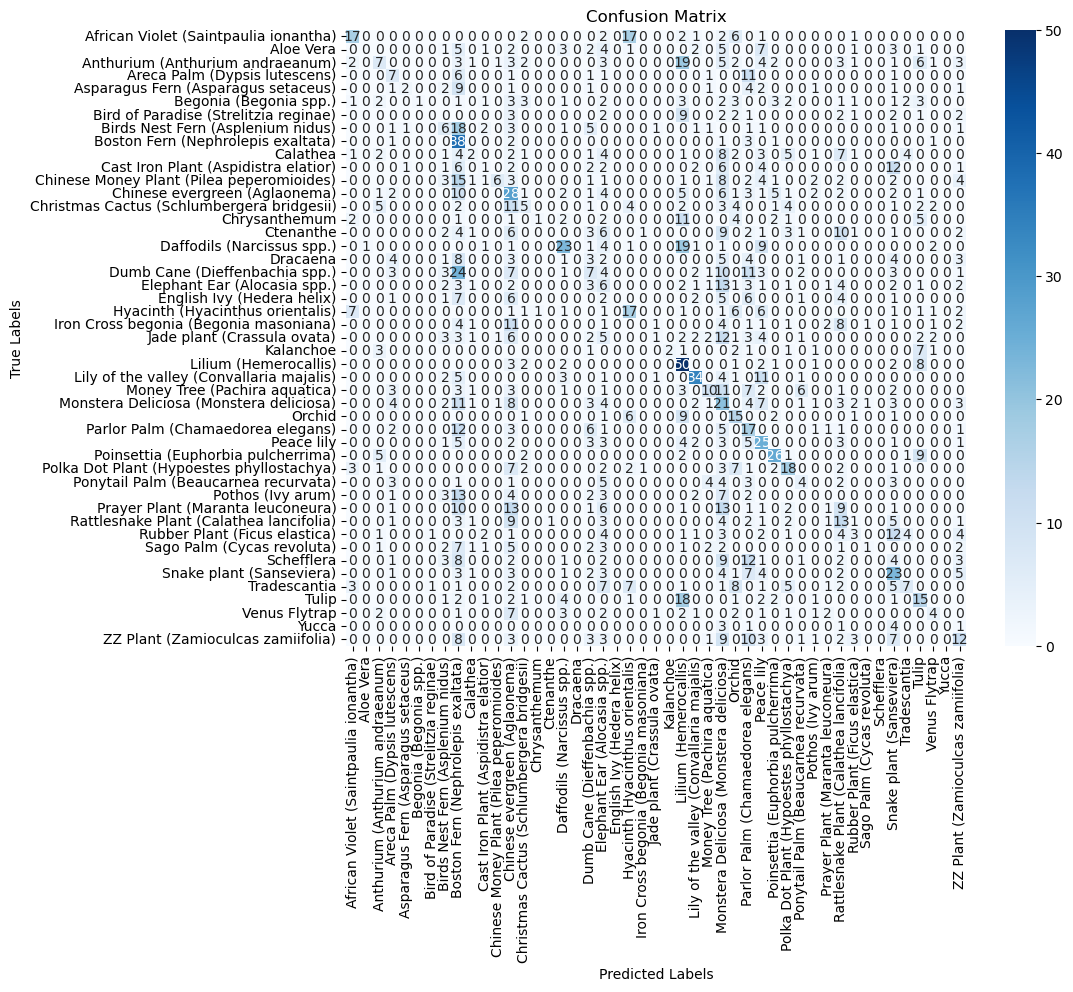

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Model 2.1


In [14]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from PIL import Image


In [15]:
# Function to load images and labels
def load_images_and_labels(directory):
    images = []
    labels = []
    for label in os.listdir(directory):  # Class label is the folder name
        class_dir = os.path.join(directory, label)
        if os.path.isdir(class_dir):
            for file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, file)
                try:
                    img = Image.open(img_path)  # Load the image as is
                    images.append(np.array(img).flatten())  # Flatten the image
                    labels.append(label)  # Folder name as label
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)



In [16]:
# Directories
train_dir = "images_train"
test_dir = "images_test"

# Load training and testing data
X_train, y_train = load_images_and_labels(train_dir)
X_test, y_test = load_images_and_labels(test_dir)



In [ ]:
# Encode labels to integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# https://chatgpt.com/share/674a5be0-7558-8001-886b-cf0dce343ee3

In [ ]:
# Train the SVM model
svm_model = SVC(kernel='linear', C=1)  # Adjust kernel and C if necessary
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)



In [ ]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Model 2.2

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image
import os

In [15]:
# Function to load images and labels
def load_images_and_labels(directory):
    images = []
    labels = []
    for label in os.listdir(directory):  # Class label is the folder name
        class_dir = os.path.join(directory, label)
        if os.path.isdir(class_dir):
            for file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, file)
                try:
                    img = Image.open(img_path)  # Load the image as is
                    images.append(np.array(img).flatten())  # Flatten the image
                    labels.append(label)  # Folder name as label
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

In [16]:
# Directories
train_dir = "images_train"
test_dir = "images_test"

# Load training and testing data
X_train, y_train = load_images_and_labels(train_dir)
X_test, y_test = load_images_and_labels(test_dir)

# Encode labels to integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [17]:
# Convert data to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [18]:
# Check if GPU is available
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")  # Use M1 GPU if available, else fallback to CPU
print(f"Using device: {device}")

Using device: mps


In [19]:
# Define a simple linear SVM model using PyTorch
class SVMModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SVMModel, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.fc(x)

In [20]:
model = SVMModel(input_dim=X_train.shape[1], output_dim=len(label_encoder.classes_)).to(device)

In [21]:
# Define loss function (hinge loss for SVM) and optimizer
criterion = nn.MultiMarginLoss()  # Hinge loss for multi-class SVM
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [25]:
# Custom hinge loss function for SVM
def hinge_loss(output, target, margin=1.0):
    # Ensure the target is on the same device as the output
    target = target.to(output.device)
    
    # Create a one-hot encoding for the target labels
    target_one_hot = torch.eye(output.shape[1], device=output.device)[target]
    
    # Get the correct class scores
    correct_class_scores = torch.sum(output * target_one_hot, dim=1)
    
    # Calculate margins
    margins = margin - correct_class_scores + output
    margins = torch.clamp(margins, min=0)  # Set the loss to 0 for correctly classified examples
    margins = margins.sum() - output.shape[0] * margin
    
    # Normalize by batch size
    return margins / output.shape[0]

In [27]:
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor.to(device))
    
    # Apply hinge loss
    loss = hinge_loss(outputs, y_train_tensor.to(device))
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


RuntimeError: MPS backend out of memory (MPS allocated: 12.57 GB, other allocations: 384.00 KB, max allowed: 18.13 GB). Tried to allocate 5.78 GB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).

# Model 2.3

In [23]:
from skimage.feature import hog
from skimage import color, io
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import os

In [24]:
# Load example dataset (you can replace this with your dataset)
def load_images_from_folder(folder):
    images, labels = [], []
    for label, subfolder in enumerate(os.listdir(folder)):
        subfolder_path = os.path.join(folder, subfolder)
        for file in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, file)
            img = io.imread(img_path)
            if img is not None:
                # Convert image to grayscale
                img_gray = color.rgb2gray(img)
                images.append(img_gray)
                labels.append(label)
    return np.array(images), np.array(labels)

In [3]:

# Extract HOG features
def extract_hog_features(images):
    features = []
    for img in images:
        hog_feat = hog(img, 
                       orientations=8, 
                       pixels_per_cell=(16, 16), 
                       cells_per_block=(1, 1), 
                       block_norm='L2-Hys')
        features.append(hog_feat)
    return np.array(features)

In [4]:
# Load dataset
image_folder = "processed_images"  # Replace with your folder path
images, labels = load_images_from_folder(image_folder)

In [5]:
# Extract features
features = extract_hog_features(images)

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

## Decision Tree with HOG

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_predictions)}")
print(classification_report(y_test, dt_predictions))

## SVM with HOG

In [ ]:
svm_classifier = SVC(kernel='linear')  # You can try other kernels like 'rbf'
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, svm_predictions)}")
print("Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 0.15889114266396215


# Model 2.4
### HOG + SVM

In [4]:
!pip install scikit-image

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------- ----------- 9.2/12.9 MB 57.1 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 53.9 MB/s eta 0:00:00


In [5]:
import skimage

In [6]:
from skimage.feature import hog
from skimage import color, io
# from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
# import os

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

ROOT_DIR = 'processed_images'
TRAIN_DIR = 'images_train'
VAL_DIR = 'images_val'
TEST_DIR = 'images_test'
SPLIT_RATIO = 0.2
TEST_RATIO = 0.15
VAL_RATIO = 0.1765
RANDOM_STATE = 42

os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(VAL_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)

for class_name in os.listdir(ROOT_DIR):
    class_path = os.path.join(ROOT_DIR, class_name)
    if os.path.isdir(class_path):
        if ".DS_Store" in class_path:
            continue

        images = os.listdir(class_path) # gets all images in class

        train_val_images, test_images = train_test_split(images, test_size=TEST_RATIO, random_state=RANDOM_STATE)
        train_images, val_images = train_test_split(train_val_images, test_size=VAL_RATIO, random_state=RANDOM_STATE)

        train_class_dir = os.path.join(TRAIN_DIR, class_name)
        val_class_dir = os.path.join(VAL_DIR, class_name)
        test_class_dir = os.path.join(TEST_DIR, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Copy train images
        for img_name in train_images:
            shutil.copy(os.path.join(class_path, img_name), os.path.join(train_class_dir, img_name))

        # Copy validation images
        for img_name in val_images:
            shutil.copy(os.path.join(class_path, img_name), os.path.join(val_class_dir, img_name))

        # Copy test images
        for img_name in test_images:
            shutil.copy(os.path.join(class_path, img_name), os.path.join(test_class_dir, img_name))

In [4]:
# Load example dataset (you can replace this with your dataset)
def load_images_from_folder(folder):
    images, labels = [], []
    for label, subfolder in enumerate(os.listdir(folder)):
        subfolder_path = os.path.join(folder, subfolder)
        for file in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, file)
            img = io.imread(img_path)
            if img is not None:
                # Convert image to grayscale
                img_gray = color.rgb2gray(img)
                images.append(img_gray)
                labels.append(label)
    return np.array(images), np.array(labels)

In [36]:
# Load dataset (train, validation, test)
train_images, train_labels = load_images_from_folder(TRAIN_DIR)
val_images, val_labels = load_images_from_folder(VAL_DIR)
test_images, test_labels = load_images_from_folder(TEST_DIR)

In [8]:
# Extract HOG features
def extract_hog_features(images):
    features = []
    for img in images:
        hog_feat = hog(img, 
                       orientations=12, # 9, 12, 8 orig
                       pixels_per_cell=(16, 16), # (8, 8), (16, 16) orig
                       cells_per_block=(2, 2), # (2, 2), (1, 1) orig
                       block_norm='L2-Hys')
        features.append(hog_feat)
    return np.array(features)

In [9]:
# Extract HOG features for all sets
X_train = extract_hog_features(train_images)
X_val = extract_hog_features(val_images)
X_test = extract_hog_features(test_images)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_test_scaled = scaler.fit_transform(X_train)
X_val_test_scaled = scaler.transform(X_val)
X_test_test_scaled = scaler.transform(X_test)

In [11]:
svm_classifier = SVC(kernel='rbf')  # You can also try other kernels like 'rbf'
svm_classifier.fit(X_train_test_scaled, train_labels)

svm_train_predictions = svm_classifier.predict(X_train_test_scaled)
print(f"SVM Train Accuracy: {accuracy_score(train_labels, svm_train_predictions)}")
print(f"Classification report: {classification_report(train_labels, svm_train_predictions)}")
svm_val_predictions = svm_classifier.predict(X_val_test_scaled)
print(f"SVM Validation Accuracy: {accuracy_score(val_labels, svm_val_predictions)}")
print(f"Classification report: {classification_report(val_labels, svm_val_predictions)}")
svm_test_predictions = svm_classifier.predict(X_test_test_scaled)
print(f"SVM Test Accuracy: {accuracy_score(test_labels, svm_test_predictions)}")
print(f"Classification report: {classification_report(test_labels, svm_test_predictions)}")

SVM Train Accuracy: 0.8735085847317877
Classification report:               precision    recall  f1-score   support

           0       0.75      0.98      0.85       235
           1       0.85      0.91      0.88       176
           2       0.86      0.93      0.89       317
           3       1.00      0.85      0.92       131
           4       0.99      0.76      0.86       117
           5       0.96      0.80      0.87       164
           6       0.99      0.85      0.91       125
           7       0.94      0.82      0.87       202
           8       0.89      0.82      0.85       214
           9       0.96      0.85      0.90       230
          10       0.93      0.86      0.89       186
          11       0.66      0.93      0.77       359
          12       0.90      0.95      0.92       266
          13       0.96      0.86      0.91       218
          14       0.99      0.70      0.82       145
          15       0.98      0.87      0.92       242
          16       

c:\Users\yusop\miniconda3\envs\cse151a\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yusop\miniconda3\envs\cse151a\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yusop\miniconda3\envs\cse151a\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

SVM Test Accuracy: 0.24497991967871485
Classification report:               precision    recall  f1-score   support

           0       0.22      0.37      0.27        51
           1       0.36      0.45      0.40        38
           2       0.15      0.20      0.17        69
           3       0.75      0.21      0.32        29
           4       0.88      0.27      0.41        26
           5       0.07      0.03      0.04        36
           6       0.18      0.07      0.11        27
           7       0.38      0.14      0.20        44
           8       0.38      0.45      0.41        47
           9       0.15      0.04      0.06        50
          10       0.29      0.17      0.22        40
          11       0.23      0.59      0.33        78
          12       0.21      0.38      0.27        58
          13       0.27      0.09      0.13        47
          14       1.00      0.03      0.06        32
          15       0.24      0.15      0.18        53
          16       

c:\Users\yusop\miniconda3\envs\cse151a\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yusop\miniconda3\envs\cse151a\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yusop\miniconda3\envs\cse151a\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

### HOG + SVM FN/FP

In [37]:
from sklearn.metrics import confusion_matrix

# Ensure test_images are in the right format (flatten if necessary)
# For SVMs, typically input is 2D, so flatten if they are in 4D (e.g., for images):
# Assuming test_images is a NumPy array of shape (num_samples, channels, height, width)
if len(test_images.shape) > 2:
    num_samples = test_images.shape[0]
    test_images = test_images.reshape(num_samples, -1)

# Compute the confusion matrix
cm2 = confusion_matrix(test_labels, svm_test_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm2)


Confusion Matrix:
[[19  0  1 ...  0  0  0]
 [ 0 17  0 ...  0  0  0]
 [ 1  0 14 ...  0  0  2]
 ...
 [ 5  0  0 ...  0  0  1]
 [ 0  0  1 ...  0  0  2]
 [ 1  1  2 ...  0  0 27]]


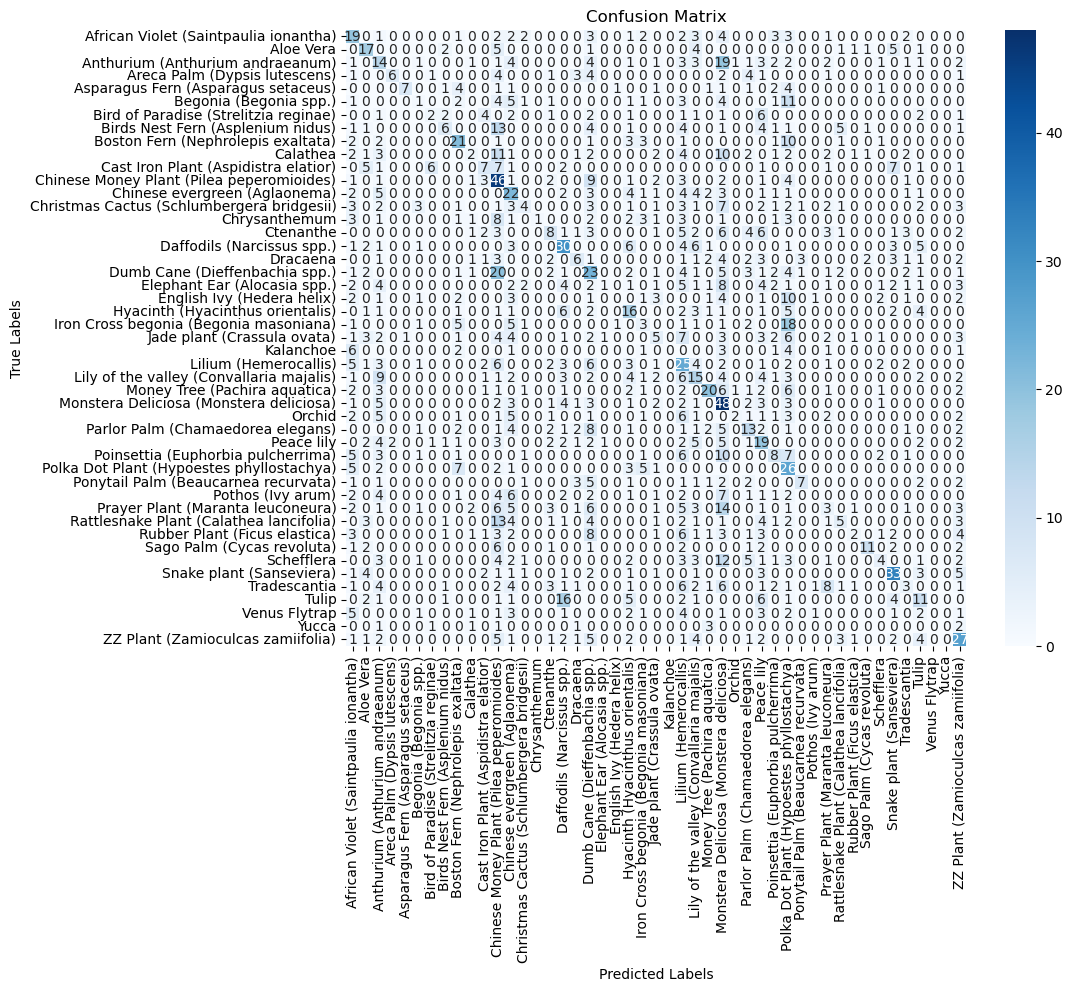

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
